In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

In [2]:
#Reading the Water temperatur file for 2022
df_wt22 = pd.read_csv("Merging\Wassertemperatur\wt_22.csv", encoding = 'unicode_escape', sep = ';')
#Removing the forth useless col
del df_wt22["Unnamed: 3"]
#Replace the non-number values for O2 content with NaN
df_wt22['Wassertemperatur_[°C]'].replace(['I','W','F','S','FW','FU','FWU','WU','WB',
                                           'UW','U','UN','UB','FB','IU','SU','BU','X','WN','SN',
                                          'FN','FUN','WUN','XN','FBN','KWN','NU','WNU','FNU','FWNU','SNU',
                                           'XNU','BNU','BN','XUN','FBUN','KWUN'], np.nan, inplace=True)
#Replace the comma in with dot for decimals to be able to change them to float later
df_wt22['Wassertemperatur_[°C]'] = df_wt22['Wassertemperatur_[°C]'].str.replace(',','.')
#Change the date and time format to date time
df_wt22['Datum'] = pd.to_datetime(df_wt22['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_wt22['Uhrzeit'] = pd.to_datetime(df_wt22['Uhrzeit'], format='%H:%M', errors='coerce').dt.time
df_wt22

,Datum,Uhrzeit,Wassertemperatur_[°C]
0,2022-01-01,00:00:00,3.55
1,2022-01-01,00:10:00,3.54
2,2022-01-01,00:20:00,3.54
3,2022-01-01,00:30:00,3.54
4,2022-01-01,00:40:00,3.53
...,...,...,...
52557,2022-12-31,23:10:00,NaN
52558,2022-12-31,23:20:00,NaN
52559,2022-12-31,23:30:00,NaN
52560,2022-12-31,23:40:00,NaN


In [3]:
#Reading the date for Water temperatur 1988_2004
df_wt21_1st = pd.read_csv("Merging\Wassertemperatur\Bunthaus_Wassertemperatur_1988bis2004.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_wt21_1st['Wassertemperatur_[°C]'] = df_wt21_1st['Wassertemperatur_[°C]'].str.replace(',','.')
#Change the date and time format to date time
df_wt21_1st['Datum'] = pd.to_datetime(df_wt21_1st['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_wt21_1st['Uhrzeit'] = pd.to_datetime(df_wt21_1st['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_wt21_1st

,Datum,Uhrzeit,Wassertemperatur_[°C]
0,1988-06-19,01:00:00,21
1,1988-06-19,01:05:00,21
2,1988-06-19,01:10:00,21
3,1988-06-19,01:15:00,21
4,1988-06-19,01:20:00,21
...,...,...,...
802228,2004-12-31,23:10:00,3.7
802229,2004-12-31,23:20:00,3.7
802230,2004-12-31,23:30:00,3.7
802231,2004-12-31,23:40:00,3.7


In [4]:
#Reading the date for Water temperatur 2005_2021
df_wt21_2nd = pd.read_csv("Merging\Wassertemperatur\Bunthaus_Wassertemperatur_2005bis2021.csv", encoding = 'unicode_escape', sep = ';')
#Replace the comma in with dot for decimals to be able to change them to float later
df_wt21_2nd['Wassertemperatur_[°C]'] = df_wt21_2nd['Wassertemperatur_[°C]'].str.replace(',','.')
#Change the date and time format to date time
df_wt21_2nd['Datum'] = pd.to_datetime(df_wt21_2nd['Datum'], format='%Y-%m-%d', errors='coerce', utc = True).dt.date
df_wt21_2nd['Uhrzeit'] = pd.to_datetime(df_wt21_2nd['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_wt21_2nd

,Datum,Uhrzeit,Wassertemperatur_[°C]
0,2005-01-01,00:00:00,NaN
1,2005-01-01,00:10:00,NaN
2,2005-01-01,00:20:00,NaN
3,2005-01-01,00:30:00,NaN
4,2005-01-01,00:40:00,NaN
...,...,...,...
825263,2021-12-31,23:10:00,3.7
825264,2021-12-31,23:20:00,3.7
825265,2021-12-31,23:30:00,3.6
825266,2021-12-31,23:40:00,3.6


In [5]:
#Appending the dataframes
df_wt = pd.concat([df_wt21_1st, df_wt21_2nd, df_wt22], ignore_index = True)
df_wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680063 entries, 0 to 1680062
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Datum                  1680061 non-null  object
 1   Uhrzeit                1680061 non-null  object
 2   Wassertemperatur_[°C]  1607738 non-null  object
dtypes: object(3)
memory usage: 38.5+ MB


In [6]:
#Summary and formatting str to float, and change type to datetime:
df_wt['Wassertemperatur_[°C]'] = df_wt['Wassertemperatur_[°C]'].astype(float)
df_wt['Datum'] = pd.to_datetime(df_wt['Datum'])
df_wt.info()
#Exporting to csv file
df_wt.to_csv('Merging\Wassertemperatur\Wt1988_2022.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680063 entries, 0 to 1680062
Data columns (total 3 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Datum                  1680061 non-null  datetime64[ns]
 1   Uhrzeit                1680061 non-null  object        
 2   Wassertemperatur_[°C]  1607738 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 38.5+ MB


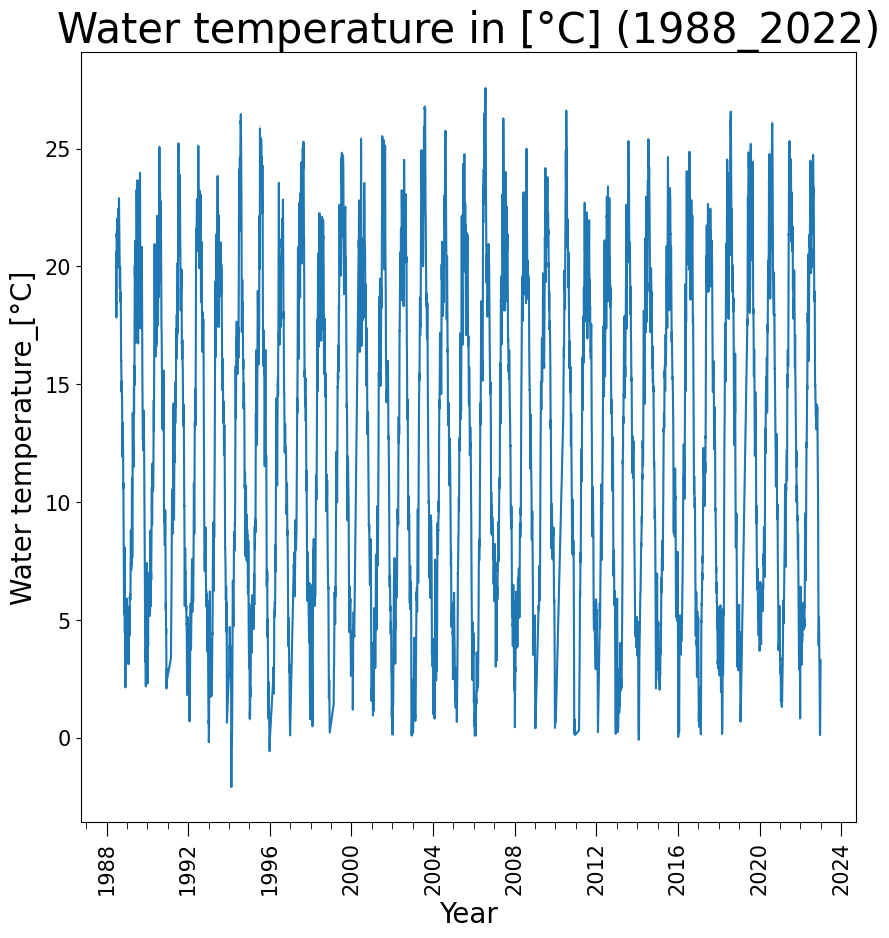

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
fig = sns.lineplot(data = df_wt, x='Datum', y='Wassertemperatur_[°C]')
fig.axes.set_title("Water temperature in [°C] (1988_2022)",fontsize=30)
fig.set_xlabel("Year",fontsize=20)
fig.set_ylabel("Water temperature_[°C]",fontsize=20)
fig.tick_params(labelsize=15)
import matplotlib.dates as md
# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.YearLocator(4))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.YearLocator())
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)
plt.show()

In [24]:
df_wt.nsmallest(200, 'Wassertemperatur_[°C]', keep='first')

,Datum,Uhrzeit,Wassertemperatur_[°C]
287882,1994-02-13,10:00:00,-2.2
287891,1994-02-13,11:30:00,-2.2
287892,1994-02-13,11:40:00,-2.2
287893,1994-02-13,11:50:00,-2.2
287894,1994-02-13,12:00:00,-2.2
...,...,...,...
287979,1994-02-14,02:10:00,-1.7
287980,1994-02-14,02:20:00,-1.7
287981,1994-02-14,02:30:00,-1.7
287982,1994-02-14,02:40:00,-1.7


In [18]:
df_wt.mean()

C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_10556\1022197967.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_wt.mean()
C:\Users\Shayan Kamali\AppData\Local\Temp\ipykernel_10556\1022197967.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_wt.mean()


Wassertemperatur_[°C]    12.816925
dtype: float64